In [211]:
# https://scipy-cookbook.readthedocs.io/items/LoktaVolterraTutorial.html
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.pyplot import cm
import numpy as np
from scipy import integrate
from matplotlib.offsetbox import AnchoredText

X_star = 1

B_y = 0
B_z = 0
a_y = 1
a_z = 1
b_y = 1
b_z = 1
K_xz   = 0.1
K_xy   = 0.1
h      = 2

#system of ode
#case 1
def dX1_dt(X, t=0):
    return np.array([B_y + b_y*np.power((X_star/K_xy),h)/(1 + np.power((X_star/K_xy),h)) - a_y*X[0],
        B_z + b_z*np.power((X_star/K_xz),h)/(1 + np.power((X_star/K_xz),h))*1/(1 + np.power((X[0]/K_yz),h)) - a_z*X[1]])
#case 2
def dX2_dt(X, t=0):
    return np.array([B_y + b_y/(1 + np.power((X_star/K_xy),h)) - a_y*X[0],
        B_z + b_z/(1 + np.power((X_star/K_xz),h))*1/(1 + np.power((X[0]/K_yz),h)) - a_z*X[1]])

def norm_df1(X):
    return abs(B_y + b_y*np.power((X_star/K_xy),h)/(1 + np.power((X_star/K_xy),h)) - a_y*X[0])+abs(B_z + b_z*np.power((X_star/K_xz),h)/(1 + np.power((X_star/K_xz),h))*1/(1 + np.power((X[0]/K_yz),h)) - a_z*X[1])

def norm_df2(X):
    return abs(B_y + b_y/(1 + np.power((X_star/K_xy),h)) - a_y*X[0])+abs(B_z + b_z/(1 + np.power((X_star/K_xz),h))*1/(1 + np.power((X[0]/K_yz),h)) - a_z*X[1])


Switching from ON to OFF
Response time of Z after switching in case K_yz = 0.01  is: 13.5369
Response time of Z after switching in case K_yz = 10  is: 14.1931


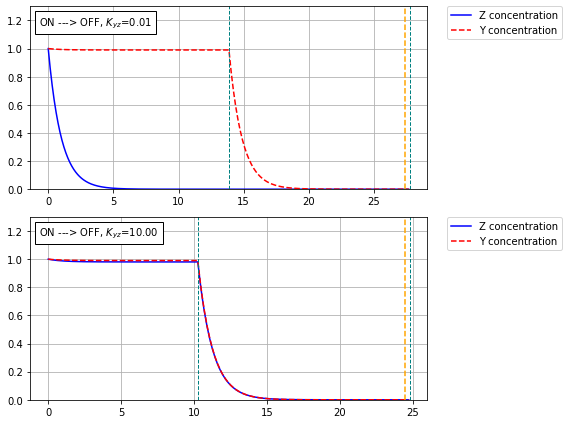

In [221]:
#define the time interval:
#t = np.linspace(0, 5,  10)
#plot general trajectories
K_yz_list   = [0.01,10]
#X0_list = [[0,0],[0,1],[1,0],[1,1]]
X0_list = [[1,1]]
num_switch =2
X_star = 1
if X_star ==1:
    print("Switching from ON to OFF")
else:
    print("Switching from OFF to ON")
for X0_start in X0_list:
    fig, ax = plt.subplots(len(K_yz_list),1,figsize=(8,6))
    i=0
    for K_yz in K_yz_list:
        X0 = X0_start
        t_start = 0
        time_interval = 50
        t_end = t_start + time_interval
        Y_all = []
        Z_all = []
        t_all = []
        steady_time = []
        response_time = []
        rt_points = []
        st_points = []
        for n in range(num_switch):
            t = np.linspace(t_start,t_end , 1000)
            x0 = X0
            sol, infodict = integrate.odeint(dX1_dt, x0, t, full_output=True) #solve ode using scipy integrate
            Y, Z = sol.T
            t_steady_step = 0
            for j in range(len(Y)):
                df = norm_df1([Y[j],Z[j]])
                if df<=0.000001:
                    break
                t_steady_step = t_steady_step + 1
            for j in range(len(Y)):
                if abs(Z[j]-Z[t_steady_step])<=Z[t_steady_step]/2:
                    response_time_step = j
                    break
            Y_all.extend(Y[0:t_steady_step])
            Z_all.extend(Z[0:t_steady_step])
            t_all.extend(t[0:t_steady_step])
            steady_time.append(t[t_steady_step] - t_start)
            response_time.append(t[response_time_step] - t_start)
            st_points.append(t[t_steady_step])
            rt_points.append(t[response_time_step])
            t_start = t[t_steady_step]
            t_end = t_end + time_interval
            X0 = [Y[t_steady_step],Z[t_steady_step]]
            X_star = 1-X_star
        #print(response_time)
        #print("Average response time is : %g"%(np.mean(response_time)))
        print("Response time of Z after switching in case K_yz = %g  is: %g"%(K_yz,response_time[1]))
        ax[i].plot(t_all, Z_all, 'b-',label='Z concentration') #plot trajectories of B
        ax[i].plot(t_all, Y_all, 'r--',label='Y concentration') #plot trajectories of A
        for st in st_points:
            ax[i].axvline(x=st,c='teal', ls='--',lw='1')
        ax[i].axvline(x=rt_points[1],c='orange', ls='--')
        ax[i].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
        ax[i].grid()
        ax[i].set_ylim([-0.00000001,1.3])
        if X_star ==1:
            at3 = AnchoredText('ON ---> OFF, $K_{yz}$=%1.2f'%K_yz, loc='upper left')
            ax[i].add_artist(at3)
        else:
            at4 = AnchoredText('OFF ---> ON, $K_{yz}$=%1.2f'%K_yz, loc='upper left')
            ax[i].add_artist(at4)
        # plt.suptitle('Evolution of Y and Z populations, k=%g'%k)
        plt.tight_layout()
        i=i+1
    plt.show()

Switching from ON to OFF
Response time of Z after switching in case K_yz = 0.01  is: 5.7541
Response time of Z after switching in case K_yz = 10  is: 0.684568


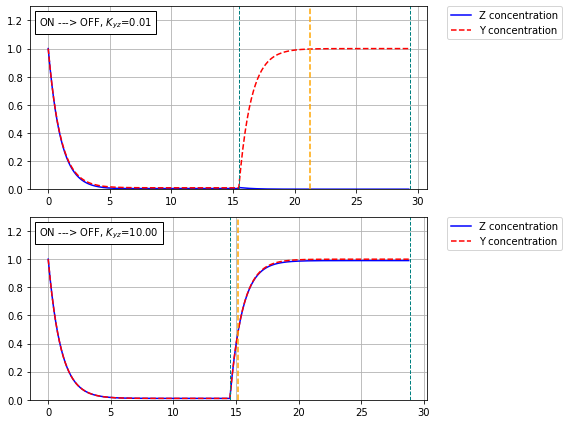

In [213]:
#define the time interval:
#t = np.linspace(0, 5,  10)
#plot general trajectories
K_yz_list   = [0.01,10]
#X0_list = [[0,0],[0,1],[1,0],[1,1]]
X0_list = [[1,1]]
num_switch =2
X_star = 1
if X_star ==1:
    print("Switching from ON to OFF")
else:
    print("Switching from OFF to ON")
for X0_start in X0_list:
    fig, ax = plt.subplots(len(K_yz_list),1,figsize=(8,6))
    i=0
    for K_yz in K_yz_list:
        X0 = X0_start
        t_start = 0
        time_interval = 50
        t_end = t_start + time_interval
        Y_all = []
        Z_all = []
        t_all = []
        steady_time = []
        response_time = []
        rt_points = []
        st_points = []
        for n in range(num_switch):
            t = np.linspace(t_start,t_end , 1000)
            x0 = X0
            sol, infodict = integrate.odeint(dX2_dt, x0, t, full_output=True) #solve ode using scipy integrate
            Y, Z = sol.T
            t_steady_step = 0
            for j in range(len(Y)):
                df = norm_df2([Y[j],Z[j]])
                if df<=0.000001:
                    break
                t_steady_step = t_steady_step + 1
            t_steady_step = min(t_steady_step,len(Z)-1)
            for j in range(len(Y)):
                if abs(Z[j]-Z[t_steady_step])<=Z[t_steady_step]/2:
                    response_time_step = j
                    break
            Y_all.extend(Y[0:t_steady_step])
            Z_all.extend(Z[0:t_steady_step])
            t_all.extend(t[0:t_steady_step])
            steady_time.append(t[t_steady_step] - t_start)
            response_time.append(t[response_time_step] - t_start)
            st_points.append(t[t_steady_step])
            rt_points.append(t[response_time_step])
            t_start = t[t_steady_step]
            t_end = t_end + time_interval
            X0 = [Y[t_steady_step],Z[t_steady_step]]
            X_star = 1-X_star
        #print(response_time)
        #print("Average response time is : %g"%(np.mean(response_time)))
        print("Response time of Z after switching in case K_yz = %g  is: %g"%(K_yz,response_time[1]))
        ax[i].plot(t_all, Z_all, 'b-',label='Z concentration') #plot trajectories of B
        ax[i].plot(t_all, Y_all, 'r--',label='Y concentration') #plot trajectories of A
        for st in st_points:
            ax[i].axvline(x=st,c='teal', ls='--',lw='1')
        ax[i].axvline(x=rt_points[1],c='orange', ls='--')
        ax[i].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
        ax[i].grid()
        ax[i].set_ylim([-0.00000001,1.3])
        if X_star ==1:
            at3 = AnchoredText('ON ---> OFF, $K_{yz}$=%1.2f'%K_yz, loc='upper left')
            ax[i].add_artist(at3)
        else:
            at4 = AnchoredText('OFF ---> ON, $K_{yz}$=%1.2f'%K_yz, loc='upper left')
            ax[i].add_artist(at4)
        # plt.suptitle('Evolution of Y and Z populations, k=%g'%k)
        plt.tight_layout()
        #print("Response time of the first switching is: %g"%response_time[0])
        i=i+1
    plt.show()